# Evaluation of angr's boyscout.py

In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
from confusion_matrix import plot_confusion_matrix
import sklearn.metrics
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Preprocessing

In [6]:
df = pd.read_csv('boyscout/boyscout.csv')
df.fillna('unknown', inplace=True)

# Fix ppc64
df.loc[df[(df['angr_arch'] == 'unknown') & (df['real_arch'] == 'ppc64el')].index, ['angr_arch', 'angr_endianness']] = ['ppc64', 'Iend_LE']

# Exclude arm64
df = df[df['angr_arch'] != 'aarch64']

# Label: arch + endianness
df['true_y'] = df['angr_arch'] + df['angr_endianness'].str.slice(-3)
df['pred_y'] = df['bs_arch'] + df['bs_endianness'].str.slice(-3)

## Metrics

In [7]:
accuracy = sklearn.metrics.accuracy_score(df['true_y'], df['pred_y'])
f1 = sklearn.metrics.f1_score(df['true_y'], df['pred_y'], average='macro')
print("Accuracy: {:.4f}".format(accuracy))
print("F1: {:.4f}".format(f1))

Accuracy: 0.9888
F1: 0.9875


## Errors

In [8]:
df[df['true_y'] != df['pred_y']][['true_y', 'pred_y']]

true_y    pred_y
12     amd64_LE    x86_LE
15     amd64_LE    x86_LE
18     amd64_LE    x86_LE
48     amd64_LE    x86_LE
49     amd64_LE    x86_LE
50     amd64_LE    x86_LE
60     amd64_LE    x86_LE
87     amd64_LE    x86_LE
111    amd64_LE    x86_LE
112    amd64_LE    x86_LE
115    amd64_LE    x86_LE
251    amd64_LE    x86_LE
262    amd64_LE    x86_LE
271    amd64_LE    x86_LE
274    amd64_LE    x86_LE
287    amd64_LE    x86_LE
305    amd64_LE    x86_LE
322    amd64_LE    x86_LE
348    amd64_LE    x86_LE
352    amd64_LE    x86_LE
370    amd64_LE    x86_LE
386    amd64_LE    x86_LE
1590   armel_LE    x86_LE
2050  mips32_BE    x86_LE
2088  mips32_BE    x86_LE
2104  mips32_BE    x86_LE
2180  mips32_BE    x86_LE
2764   ppc64_LE  armel_LE
2769   ppc64_LE  armel_LE
3036   ppc64_LE  armel_LE

## Confusion matrix

['amd64_LE', 'armel_LE', 'mips32_BE', 'mips32_LE', 'ppc64_LE', 'x86_LE']


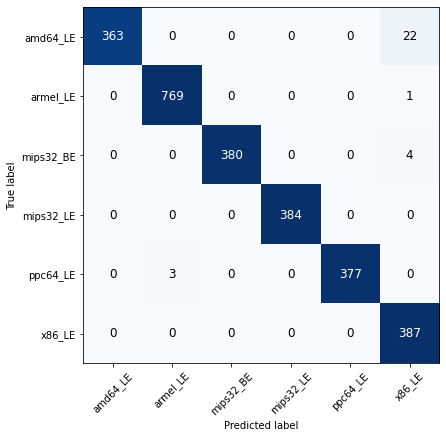

In [9]:
labels = sorted(list(set(df['true_y'].unique()) | set(df['pred_y'].unique())))
print(labels)
cm = sklearn.metrics.confusion_matrix(df['true_y'], df['pred_y'], labels=labels)
plot_confusion_matrix(cm, classes=labels, size=(8,6), title='boyscout.py confusion matrix')
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig('boyscout/confmatrix_boyscout_debian.pdf')